In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("Nat_Gas.csv")
df['Dates'] = pd.to_datetime(df['Dates'])
df = df.sort_values(by="Dates").reset_index(drop=True)



/tmp/ipython-input-2555469867.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


In [5]:
start_date = df['Dates'].min()
df['Months'] = df['Dates'].apply(lambda x: (x.year - start_date.year) * 12 + x.month - start_date.month)


In [6]:
X = df['Months'].values.reshape(-1, 1)
y = df['Prices'].values
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
max_month = df['Months'].max()
future_months = np.arange(0, max_month + 13)
future_dates = [start_date + pd.DateOffset(months=int(m)) for m in future_months]
predicted_prices = model.predict(future_months.reshape(-1, 1))


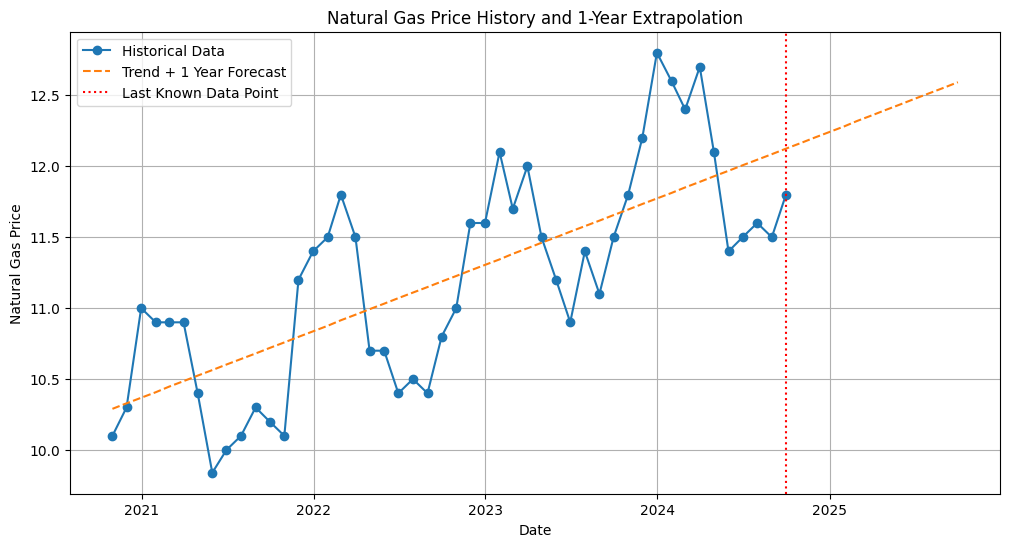

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Dates'], df['Prices'], label="Historical Data", marker='o')
plt.plot(future_dates, predicted_prices, label="Trend + 1 Year Forecast", linestyle='--')
plt.axvline(df['Dates'].max(), color='red', linestyle=':', label="Last Known Data Point")
plt.xlabel("Date")
plt.ylabel("Natural Gas Price")
plt.title("Natural Gas Price History and 1-Year Extrapolation")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def estimate_price(input_date_str):
    input_date = pd.to_datetime(input_date_str, format="%Y-%m-%d")
    months_since_start = (input_date.year - start_date.year) * 12 + input_date.month - start_date.month
    return float(model.predict(np.array([[months_since_start]]))[0])

In [11]:
user_date = input("Enter a date (YYYY-MM-DD): ")
price_estimate = estimate_price(user_date)
print(f"Estimated price on {user_date}: {price_estimate:.2f}")

Enter a date (YYYY-MM-DD): 2022-05-17
Estimated price on 2022-05-17: 11.03
